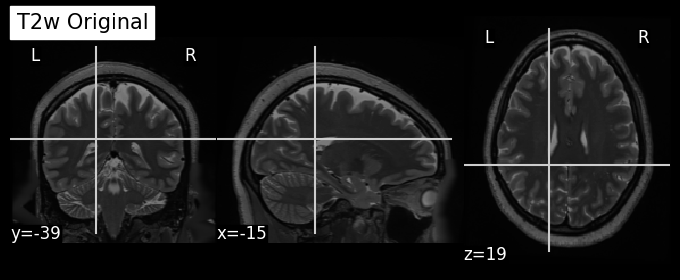

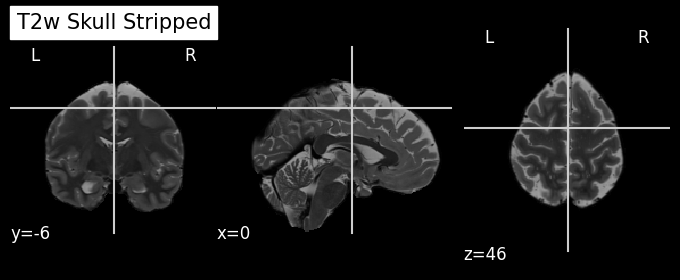

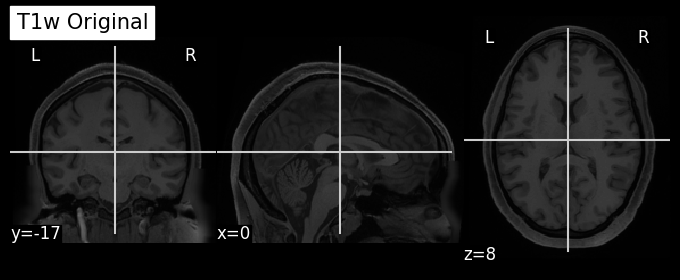

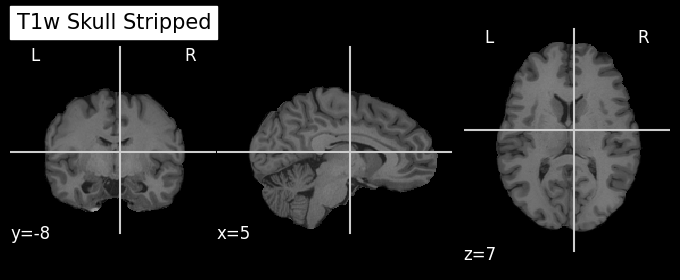

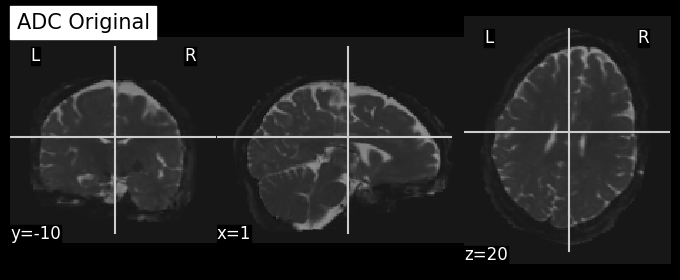

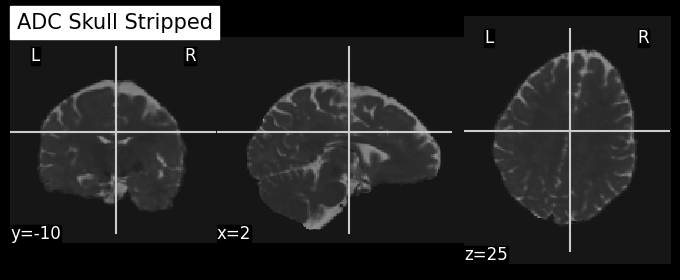

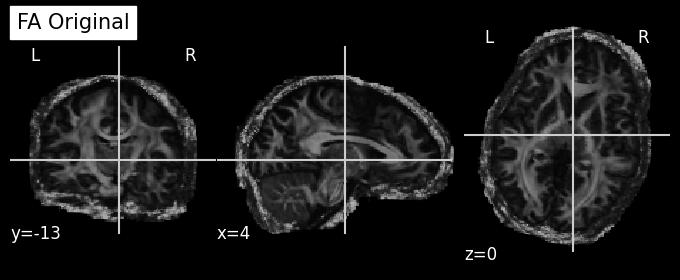

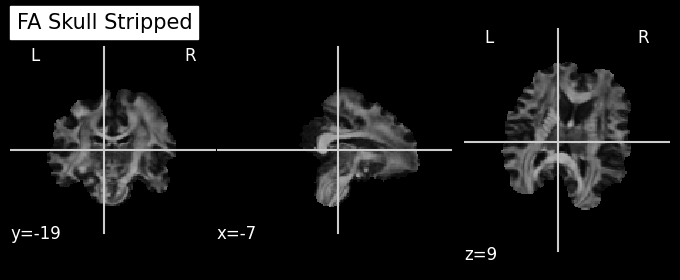

In [1]:
import os
import subprocess
import multiprocessing as mp
from nilearn import plotting
import nibabel as nib

root_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

def apply_bet(args):
    input_image_path, output_image_path = args
    command = f'bet "{input_image_path}" "{output_image_path}" -R -f 0.5 -g 0'
    subprocess.run(command, shell=True)

def main():
    # Change the working directory to the "data" folder
    os.chdir('../data/input')

    # Get the list of patient folders
    patient_folders = [folder for folder in os.listdir() if os.path.isdir(folder) and folder.startswith('E')]

    # Create the "output" subfolder in each patient folder if it doesn't exist
    for patient_folder in patient_folders:
        output_path = os.path.join(patient_folder, 'output')
        if not os.path.exists(output_path):
            os.makedirs(output_path)

    # Define the input image filenames
    input_image_filenames = [
        'T2w_1mm_noalign.nii.gz',
        'T1w_1mm.nii.gz',
        'ADC_deformed.nii.gz',
        'FA_deformed.nii.gz'
    ]
    
    # Prepare the list of input and output image paths
    tasks = []
    for patient_folder in patient_folders:
        for input_image_filename in input_image_filenames:
            input_image_path = os.path.join(patient_folder, input_image_filename)
            output_image_path = os.path.join(patient_folder, 'output', input_image_filename)
            tasks.append((input_image_path, output_image_path))

    # Use multiprocessing to run BET on all input images
    with mp.Pool() as pool:
        pool.map(apply_bet, tasks)

if __name__ == "__main__":
    main()

def display_image(image_file, title):
    """
    Display NIfTI image using nilearn.
    
    Args:
        image_file (str): Path to the NIfTI file.
        title (str): Title of the plot.
    """
    plotting.plot_anat(image_file, title=title, display_mode='ortho')
    plotting.show()

display_image(os.path.join(root_dir, 'data','input','E03', "T2w_1mm_noalign.nii.gz"), "T2w Original")
display_image(os.path.join(root_dir, 'data','input','E03', 'output', "T2w_1mm_noalign.nii.gz"), "T2w Skull Stripped")
display_image(os.path.join(root_dir, 'data','input','E03', "T1w_1mm.nii.gz"), "T1w Original")
display_image(os.path.join(root_dir, 'data','input','E03', 'output', "T1w_1mm.nii.gz"), "T1w Skull Stripped")
display_image(os.path.join(root_dir, 'data','input','E03', "ADC_deformed.nii.gz"), "ADC Original")
display_image(os.path.join(root_dir, 'data','input','E03', 'output', "ADC_deformed.nii.gz"), "ADC Skull Stripped")
display_image(os.path.join(root_dir, 'data','input','E03', "FA_deformed.nii.gz"), "FA Original")
display_image(os.path.join(root_dir, 'data','input','E03', 'output', "FA_deformed.nii.gz"), "FA Skull Stripped")

#change back to code directory
os.chdir('..')
os.chdir('..')
os.chdir('code')